# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK1"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "_PL0.0")
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData005 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)
AnalyzedData010 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.010)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData020 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.020)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData030 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.03)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData005["Error_DUREAL"].shape[0],
                        AnalyzedData010["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData020["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0],
                        AnalyzedData030["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData005["Error_UNREAL"].shape[0],
                         AnalyzedData010["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData020["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0],
                         AnalyzedData030["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(5,35,5)
ShapeTable

,DUREAL,UNREAL
5,100,100
10,100,100
15,100,100
20,100,100
25,100,100
30,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[
                        str(round(np.mean(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData030["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [
                        str(round(np.mean(AnalyzedData005["Time_UNREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData020["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData030["Time_UNREAL"])/60,2))],
                "DUREAL max":[
                        str(round(np.max(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData030["Time_DUREAL"])/60,2))],
              "UNREAL max": [
                        str(round(np.max(AnalyzedData005["Time_UNREAL"])/60,2)),
                        str(round(np.max(AnalyzedData010["Time_UNREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                        str(round(np.max(AnalyzedData020["Time_UNREAL"])/60,2)), 
                        str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)),
                        str(round(np.max(AnalyzedData030["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(5,35,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
5,1.03,1.0,2.09,1.84
10,1.25,1.24,2.13,2.7
15,2.11,2.11,4.27,4.12
20,5.81,5.92,27.95,28.15
25,8.0,8.8,41.3,43.57
30,38.63,39.27,169.23,247.82


# Error Vec

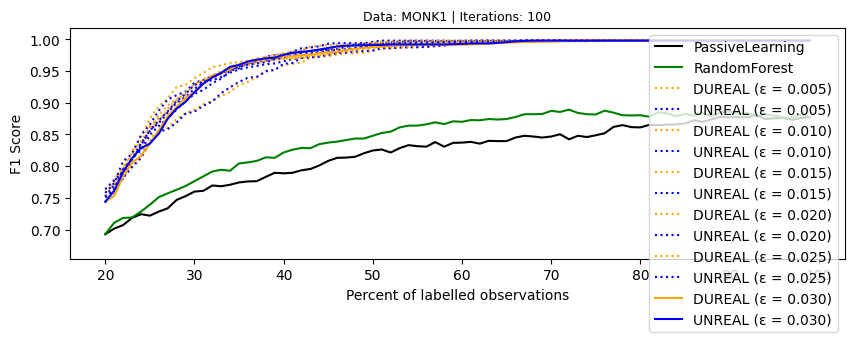

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL005": "orange",
    "UNREAL005": "blue",
    "DUREAL010": "orange",
    "UNREAL010": "blue",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL020": "orange",
    "UNREAL020": "blue",
    "DUREAL025": "orange",
    "UNREAL025": "blue",
    "DUREAL030": "orange",
    "UNREAL030": "blue"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL005": "dotted",
    "UNREAL005": "dotted",
    "DUREAL010": "dotted",
    "UNREAL010": "dotted",
    "DUREAL015": "dotted",
    "UNREAL015": "dotted",
    "DUREAL020": "dotted",
    "UNREAL020": "dotted",
    "DUREAL025": "dotted",
    "UNREAL025": "dotted",
    "DUREAL030": "solid",
    "UNREAL030": "solid"
}

LegendMapping = {
    "DUREAL005": "DUREAL (ε = 0.005)",
    "UNREAL005": "UNREAL (ε = 0.005)",
    "DUREAL010": "DUREAL (ε = 0.010)",
    "UNREAL010": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL020": "DUREAL (ε = 0.020)",
    "UNREAL020": "UNREAL (ε = 0.020)",
    "DUREAL025": "DUREAL (ε = 0.025)",
    "UNREAL025": "UNREAL (ε = 0.025)",
    "DUREAL030": "DUREAL (ε = 0.030)",
    "UNREAL030": "UNREAL (ε = 0.030)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 PassiveLearning = PassiveLearningRF["Error_RF"],
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL005 = AnalyzedData005["Error_DUREAL"],
                 UNREAL005 = AnalyzedData005["Error_UNREAL"],
                 DUREAL010 = AnalyzedData010["Error_DUREAL"],
                 UNREAL010 = AnalyzedData010["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL020 = AnalyzedData020["Error_DUREAL"],
                 UNREAL020 = AnalyzedData020["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 DUREAL030 = AnalyzedData030["Error_DUREAL"],
                 UNREAL030 = AnalyzedData030["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [6]:
WRSTResults = WilcoxonRankSignedTest({"PassiveLearning" : PassiveLearningRF["Error_RF"],
                 "RandomForest" : RandomForesResults["Error_RF"],
                 "DUREAL005" : AnalyzedData005["Error_DUREAL"],
                 "UNREAL005" : AnalyzedData005["Error_UNREAL"],
                 "DUREAL010" : AnalyzedData010["Error_DUREAL"],
                 "UNREAL010" : AnalyzedData010["Error_UNREAL"],
                 "DUREAL015" : AnalyzedData015["Error_DUREAL"],
                 "UNREAL015" : AnalyzedData015["Error_UNREAL"],
                 "DUREAL020" : AnalyzedData020["Error_DUREAL"],
                 "UNREAL020" : AnalyzedData020["Error_UNREAL"],
                 "DUREAL025" : AnalyzedData025["Error_DUREAL"],
                 "UNREAL025" : AnalyzedData025["Error_UNREAL"],
                 "DUREAL030" : AnalyzedData030["Error_DUREAL"],
                 "UNREAL030" : AnalyzedData030["Error_UNREAL"]},
                 RoundingVal=5)
WRSTResults_LatexTable = WRSTResults.to_latex()
print(WRSTResults_LatexTable)

\begin{tabular}{lllllllllllllll}
\toprule
 & PassiveLearning & RandomForest & DUREAL005 & UNREAL005 & DUREAL010 & UNREAL010 & DUREAL015 & UNREAL015 & DUREAL020 & UNREAL020 & DUREAL025 & UNREAL025 & DUREAL030 & UNREAL030 \\
\midrule
PassiveLearning & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  \\
RandomForest & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  \\
DUREAL005 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  \\
UNREAL005 & 0.0 & 0.0 & 0.46495 & 1.0 &  &  &  &  &  &  &  &  &  &  \\
DUREAL010 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  \\
UNREAL010 & 0.0 & 0.0 & 0.0 & 0.0 & 0.04452 & 1.0 &  &  &  &  &  &  &  &  \\
DUREAL015 & 0.0 & 0.0 & 0.0 & 0.0 & 0.60021 & 0.64576 & 1.0 &  &  &  &  &  &  &  \\
UNREAL015 & 0.0 & 0.0 & 0.0 & 0.0 & 0.10992 & 0.29251 & 0.00034 & 1.0 &  &  &  &  &  &  \\
DUREAL020 & 0.0 & 0.0 & 0.0 & 0.0 & 0.00017 & 0.0395 & 0.0 & 0.0 & 1.0 &  &  &  &  &  \\
UNREAL020 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.00436 & 0.0 & 0.0 & 0.46456 & 1.0 &  &  &  &  \\
D

# Input

In [7]:
AnalyzedDataSmall = AnalyzedData010
AnalyzedDataLarge = AnalyzedData030

# Selection History

In [8]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
85,11.406250,False,False,True,False,False,False,False,True,False,True,False,True
95,11.571429,False,False,False,True,False,False,False,True,False,False,True,False
103,12.661972,False,False,False,False,True,False,True,False,False,False,True,False
74,12.863014,True,False,True,False,True,False,False,True,False,True,False,True
100,12.873016,False,False,False,False,True,True,False,True,False,False,False,False


# Tree Counts

In [9]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

# Number of All Trees

In [10]:
np.log([1])

array([0.])

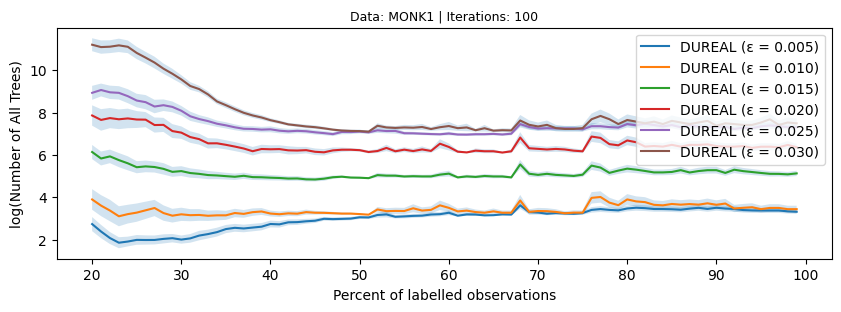

In [11]:
### Linetype ###
linestyles = {"DUREAL005" : "solid",
"DUREAL010" : "solid",
"DUREAL015" : "solid",
"DUREAL020" : "solid",
"DUREAL025" : "solid",
"DUREAL030" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL005 = np.log(AnalyzedData005["TreeCounts_ALL_UNREAL"]),
                 DUREAL010 = np.log(AnalyzedData010["TreeCounts_ALL_UNREAL"]),
                 DUREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
                 DUREAL020 = np.log(AnalyzedData020["TreeCounts_ALL_UNREAL"]),
                 DUREAL025 = np.log(AnalyzedData025["TreeCounts_ALL_UNREAL"]),
                 DUREAL030 = np.log(AnalyzedData030["TreeCounts_ALL_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of All Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.2,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

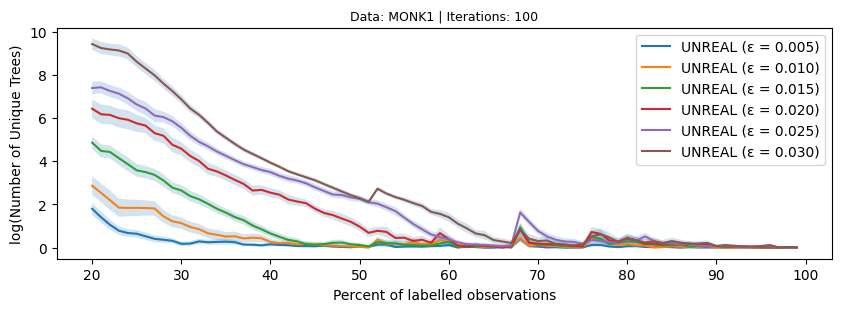

In [12]:
### Linetype ###
linestyles = {"UNREAL005" : "solid",
"UNREAL010" : "solid",
"UNREAL015" : "solid",
"UNREAL020" : "solid",
"UNREAL025" : "solid",
"UNREAL030" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL005 = np.log(AnalyzedData005["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL010 = np.log(AnalyzedData010["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL015 = np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL020 = np.log(AnalyzedData020["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL025 = np.log(AnalyzedData025["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL030 = np.log(AnalyzedData030["TreeCounts_UNIQUE_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Unique Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.20,
                 VarInput = False,
                 CriticalValue = 1.96)